<a href="https://colab.research.google.com/github/Cavera360JM/ONIA/blob/main/ONIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatísticas Descritivas:
                 id         col_0         col_1         col_2         col_3  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean    7492.725048     34.041646      3.008547      2.270856     12.809551   
std     4347.394049      8.428862      0.789293      0.555685      2.809632   
min        0.000000      2.334047      0.000000      0.000000      2.291309   
25%     3706.250000     28.314237      2.473870      1.908040     10.929376   
50%     7500.000000     33.597613      2.995180      2.235584     12.876576   
75%    11293.250000     39.444095      3.548535      2.623687     14.686464   
max    14999.000000     71.608174      6.333788      4.697276     24.071470   

              col_4         col_5         col_6         col_7         col_8  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      25.362808      7.622088      4.929185      5.845511      3.899460   
std        5.808446      

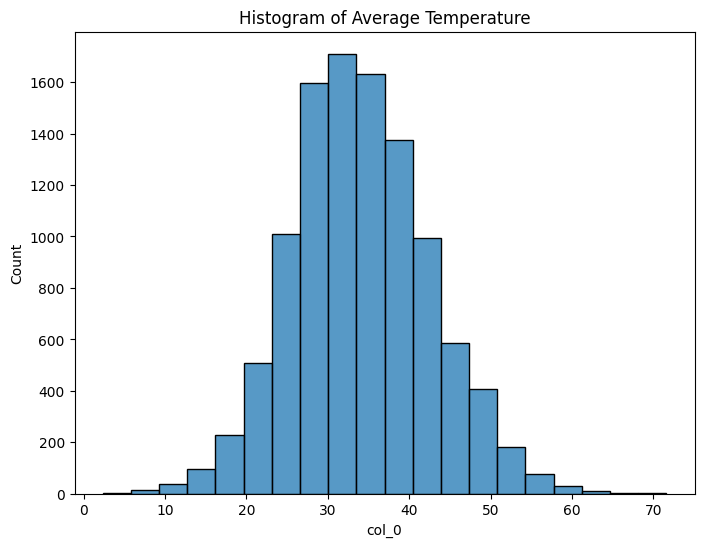

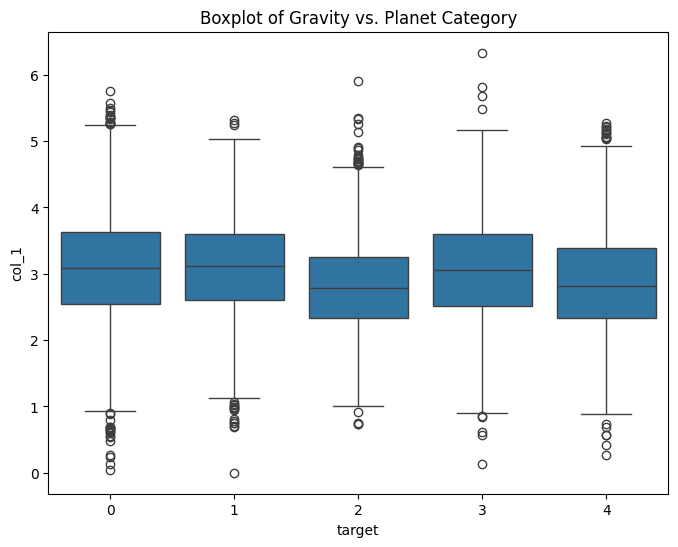

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Acurácia média (F1-score): 0.5495770756697381
Arquivo de envio 'submission.csv' criado com sucesso!
F1-score no conjunto de treino: 0.8196489775266214


In [4]:
import pandas as pd  # PT-BR: Importa a biblioteca Pandas para manipulação de dados. EN-US: Imports the Pandas library for data manipulation.
from sklearn.tree import DecisionTreeClassifier  # PT-BR: Importa o classificador de Árvore de Decisão do Scikit-learn. EN-US: Imports the Decision Tree classifier from Scikit-learn.
from sklearn.model_selection import GridSearchCV, cross_val_score  # PT-BR: Importa GridSearchCV e cross_val_score para otimização de hiperparâmetros e validação cruzada. EN-US: Imports GridSearchCV and cross_val_score for hyperparameter optimization and cross-validation.
from sklearn.metrics import f1_score  # PT-BR: Importa a métrica F1-score para avaliação do modelo. EN-US: Imports the F1-score metric for model evaluation.
import matplotlib.pyplot as plt  # PT-BR: Importa Matplotlib para visualização de dados. EN-US: Imports Matplotlib for data visualization.
import seaborn as sns  # PT-BR: Importa Seaborn para visualizações estatísticas. EN-US: Imports Seaborn for statistical visualizations.

# 1. Carregar os dados de treinamento e teste
# 1. Load training and test data
train_data = pd.read_csv("treino.csv")
test_data = pd.read_csv("teste.csv")

# 2. Preparar os dados
# 2. Prepare the data
features = [f"col_{i}" for i in range(13)]  # PT-BR: Cria uma lista com os nomes das colunas de características. EN-US: Creates a list with the feature column names.
X_train = train_data[features]  # PT-BR: Separa as características do conjunto de treinamento. EN-US: Separates the training set features.
y_train = train_data["target"]  # PT-BR: Separa a variável alvo do conjunto de treinamento. EN-US: Separates the training set target variable.
X_test = test_data[features]  # PT-BR: Separa as características do conjunto de teste. EN-US: Separates the test set features.

# 3. Análise Exploratória de Dados (EDA)
# 3. Exploratory Data Analysis (EDA)

# 3.1. Estatísticas Descritivas
# 3.1. Descriptive Statistics
print("Estatísticas Descritivas:")  # PT-BR: Imprime as estatísticas descritivas do conjunto de treinamento. EN-US: Prints the descriptive statistics of the training set.
print(train_data.describe())

# 3.2. Visualizações
# 3.2. Visualizations

# Histograma da coluna 'col_0' (Temperatura Média)
# Histogram of 'col_0' (Average Temperature)
# Processo: Usamos histplot do Seaborn para visualizar a distribuição da coluna 'col_0', que representa a temperatura média.
# Process: We used seaborn's histplot to visualize the distribution of the 'col_0' column, which represents the average temperature.
# Resultado: O histograma mostra a frequência de diferentes faixas de temperatura nos dados de treinamento, fornecendo informações sobre a distribuição de temperatura dos planetas.
# Result: The histogram shows the frequency of different temperature ranges in the training data, providing insights into the temperature distribution of the planets.
plt.figure(figsize=(8, 6))
sns.histplot(train_data["col_0"], bins=20)
plt.title("Histogram of Average Temperature")  # PT-BR: Histograma da Temperatura Média. EN-US:Histogram of Average Temperature.
plt.show()

# Boxplot da relação entre 'col_1' (Gravidade) e 'target' (Categoria do Planeta)
# Boxplot of 'col_1' (Gravity) vs. 'target' (Planet Category)
# Processo: Usamos boxplot do Seaborn para comparar a distribuição da coluna 'col_1' (gravidade) entre as diferentes categorias de planetas (target).
# Process: We used seaborn's boxplot to compare the distribution of the 'col_1' column (gravity) across different planet categories (target).
# Resultado: O boxplot mostra a mediana, quartis e outliers da gravidade para cada categoria de planeta, ajudando a identificar possíveis relações entre gravidade e classificação do planeta.
# Result: The boxplot shows the median, quartiles, and outliers of gravity for each planet category, helping to identify potential relationships between gravity and planet classification.
plt.figure(figsize=(8, 6))
sns.boxplot(x="target", y="col_1", data=train_data)
plt.title("Boxplot of Gravity vs. Planet Category")  # PT-BR: Boxplot da Gravidade por Categoria de Planeta. EN-US: Boxplot of Gravity vs. Planet Category.
plt.show()

# 4. Ajuste de Hiperparâmetros com GridSearchCV
# 4. Hyperparameter Tuning with GridSearchCV
param_grid = {  # PT-BR: Define a grade de hiperparâmetros a serem testados. EN-US: Defines the hyperparameter grid to be tested.
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="f1_macro")  # PT-BR: Cria o objeto GridSearchCV. EN-US: Creates the GridSearchCV object.
grid_search.fit(X_train, y_train)  # PT-BR: Treina o modelo com GridSearchCV. EN-US: Trains the model with GridSearchCV.

best_model = grid_search.best_estimator_  # PT-BR: Armazena o melhor modelo encontrado. EN-US: Stores the best model found.
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")  # PT-BR: Imprime os melhores hiperparâmetros. EN-US: Prints the best hyperparameters.

# 5. Avaliação do Modelo com Validação Cruzada (usando F1-score)
# 5. Model Evaluation with Cross-Validation (using F1-score)
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="f1_macro")  # PT-BR: Avalia o modelo usando validação cruzada. EN-US: Evaluates the model using cross-validation.
print(f"Acurácia média (F1-score): {scores.mean()}")  # PT-BR: Imprime a acurácia média (F1-score). EN-US: Prints the average accuracy (F1-score).

# 6. Fazer previsões no conjunto de teste
# 6. Make predictions on the test set
predictions = best_model.predict(X_test)  # PT-BR: Faz previsões no conjunto de teste. EN-US: Makes predictions on the test set.

# 7. Criar o arquivo de envio
# 7. Create submission file
submission = pd.DataFrame({"id": test_data["id"], "target": predictions})  # PT-BR: Cria um DataFrame com as previsões. EN-US: Creates a DataFrame with the predictions.
submission.to_csv("submission.csv", index=False)  # PT-BR: Salva as previsões em um arquivo CSV. EN-US: Saves the predictions to a CSV file.
print("Arquivo de envio 'submission.csv' criado com sucesso!")  # PT-BR: Imprime mensagem de sucesso. EN-US: Prints success message.

# 8. Avaliação do modelo no conjunto de treino para o relatório
# 8. Model evaluation on the training set for reporting
f1 = f1_score(y_train, best_model.predict(X_train), average='macro')  # PT-BR: Calcula o F1-score no conjunto de treino. EN-US: Calculates the F1-score on the training set.
print(f"F1-score no conjunto de treino: {f1}")  # PT-BR: Imprime o F1-score no conjunto de treino. EN-US: Prints the F1-score on the training set.

# 9. Análise de Erros (opcional)
# 9. Error Analysis (optional)
# Identificar instâncias classificadas incorretamente
# Identify incorrectly classified instances
train_predictions = best_model.predict(X_train)  # PT-BR: Faz previsões no conjunto de treino. EN-US: Makes predictions on the training set.
errors = train_data[train_predictions != y_train]  # PT-BR: Identifica as instâncias classificadas incorretamente. EN-US: Identifies the incorrectly classified instances.